In [1]:
pip install country_converter 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pycountry_convert 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.9 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.0/229.0 kB 17.1 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681831 sha256=f2ee3a6c175bfe5474fad0909de22cd4a11316a1b5508d038a6d0201d658364d
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [3]:
## Data ## 
import pandas as pd
import numpy as np

## Country Code ## 
import country_converter as coco
import pycountry_convert as pc

## Visualization ## 
import matplotlib.pyplot as plt 
import seaborn as sns 
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling ## 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There are <b>12</b> columns in total, which consist of <b>5</b> integer types and <b>7</b> object types.

In [6]:
# drop Unnamed column
df.drop(columns=['Unnamed: 0'])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
df = df.reset_index()

In [10]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=df['salary_in_usd'], name='Salary Histogram', marker_color='coral'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df['salary_in_usd'], name='Salary Box Plot', marker_color='coral'),
    row=1, col=2
)

fig.update_layout( 
    title_text="Salary in USD Distribution",
    template='plotly_dark')
fig.show()

Salary in USD has a <b>right skewed</b> distribution, which is a typical distribution happening in income data. This means that most people earn in the low/medium range of salaries with a few exceptions that are distributed along a large range of higher values.

In [11]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [12]:
salary_outlier_index = find_outliers_IQR(df['salary_in_usd']).index.tolist()
print(salary_outlier_index)
print('Number of Outliers in Salary in USD data: ', len(salary_outlier_index))

[25, 33, 63, 97, 157, 225, 252, 482, 519, 523]
Number of Outliers in Salary in USD data:  10


In [13]:
salary_in_usd = df['salary_in_usd']
print('Mean Salary in USD: ', salary_in_usd.values.mean())
print('Median Salary in USD: ', np.median(salary_in_usd.values))
print('Minimum Salary in USD: ', salary_in_usd.values.min())
print('Maximum Salary in USD: ', salary_in_usd.values.max())

Mean Salary in USD:  112297.86985172982
Median Salary in USD:  101570.0
Minimum Salary in USD:  2859
Maximum Salary in USD:  600000


By visualizing salary in usd, I observe potential outliers existing in the target data set. 10 outliers are detected using statistical (IQR) method. However, since the maximum income value, which is 600K in USD, is a <b>reasonable income</b> for top 5% workers, I will <mark>NOT</mark> remove any outlier in the dataset.

# Work Year

In [14]:
work_year_counts = df['work_year'].value_counts().sort_values(ascending=True)
fig = go.Figure(data=[go.Bar(
            x=work_year_counts.index.astype('str'), 
            y=work_year_counts.values, 
            text=work_year_counts.values,
            marker_color=['peachpuff', 'coral', 'orangered'])])
fig.update_layout(
    title='Work Year', 
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Salary Paid',
        titlefont_size=16
    ),
    template='plotly_dark',
)
fig.show()

From the barplot, I observe that the proportion of data from <b>salaries paid during 2022</b> is the highest, while the proportion of data form <b>salaries paid during 2020</b> is the lowest.

# Experience Level

In [15]:
colors=['orangered', 'coral', 'peachpuff', 'darkred']
experience_level_counts = df['experience_level'].value_counts()

fig = go.Figure(data=[go.Pie(
            values=experience_level_counts.values, 
            labels=['Senior', 'Middle', 'Entry', 'Executive'], 
            textinfo='percent+value',
            marker_colors=colors)])
fig.update_layout(
    title_text='Experience Level',
    template='plotly_dark'
)
fig.show()

From the pie chart, about <b>46.1%</b> of employees is at <mark>senior level</mark>, about <b>35.1%</b> of them is at <mark>middle-level</mark>, about <b>14.5%</b> of them is at <mark>entry level</mark>, and about <b>4.28%</b> of them is at <mark>executive level</mark>

# Employment Type

In [16]:
colors=['grey', 'orangered', 'coral', 'peachpuff',]
employment_type_counts = df['employment_type'].value_counts()

fig = px.pie(df,
            values=employment_type_counts.values, 
            names=['Full Time', 'Part Time', 'Contract', 'Freelance'], 
            title='Employment Type',
            color_discrete_sequence=colors)
fig.update_layout(
    template='plotly_dark'
)
fig.show()

Form the bar chart, there are <b>96.9%</b> of employees are full time workers, and few of them are distributed into part time workers, contract workers, and freelancers. To see the specific value, you can hover on each value's pie chart.

# Job Title

In [17]:
top20_job_title = df['job_title'].value_counts().sort_values(ascending=False)[:20]
fig = px.bar(df, 
            x=top20_job_title.index, 
            y=top20_job_title.values, 
            text=top20_job_title.values,
            color=top20_job_title.values,
            color_continuous_scale='YlOrBr',
            title='Top 20 Job Title')
fig.update_layout(
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Employees',
        titlefont_size=16
    ),
    xaxis_tickangle=60,
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=10
)
fig.show()

From the bar chart, the highest proportion of employees is working as <mark>data scientists</mark>, followed by <mark>data engineer</mark>, <mark>data analyst</mark>, <mark>machine learning engineer</mark>, and <mark>research scientists</mark>. I can observe that the dataset regarding job title is <b>highly imbalanced</b> as there is a significant difference between proportion between job title (for example, 143 employees are working as data scientist, while only 5 people are working as business data analyst).

# Employee Residence

In [18]:
df['employee_residence'] = coco.convert(df['employee_residence'], to='ISO3')

In [19]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.OrRd,
                    template='plotly_dark',
                    title='Employee Residence Distribution Map')

fig.show()

In [20]:
top10_residence= df['employee_residence'].value_counts().sort_values(ascending=False)[:10]
fig = px.bar(df, 
            x=top10_residence.index, 
            y=top10_residence.values, 
            text=top10_residence.values,
            color=top10_residence.values,
            color_continuous_scale='OrRd',
            title='Top 10 Countries that Employees Reside')
fig.update_layout(
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Employees',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=12
)
fig.show()

From the bar chart, the highest proportion of countries that employees reside is <mark>US</mark>, followed by <mark>GB</mark>, <mark>IN</mark>, <mark>CA</mark>, and <mark>DE</mark>. The data for countries that employees reside is <b>highly imbalanced</b> as there are 332 data for USA, while rest are under 50.

# Remote Ratio

In [21]:
remote_ratio_counts = df['remote_ratio'].value_counts()
colors=['darkred', 'coral', 'orangered']
fig = go.Figure(data=[go.Pie(labels=['Fully Remote', 'Not Remote', 'Partially Remote'],
                             values=remote_ratio_counts.values,
                             hole=.3,
                             textinfo='percent+value',
                             marker_colors=colors)])
fig.update_layout(
    title_text='Remote Ratio',
    template='plotly_dark'
)
fig.show()

From the bar chart, I observe about <b>62.8%</b> of employees are working <mark>fully remote</mark>, about <b>20.9%</b> of employees are <mark>not working remote at all</mark>, and about <b>16.3%</b> of employees are working <mark>partially remote</mark>.

# Company Location

In [22]:
company_location = df['company_location'].value_counts()
fig = px.choropleth(locations=company_location.index,
                    color=company_location.values,
                    color_continuous_scale=px.colors.sequential.amp,
                    template='plotly_dark',
                    title='Company Location Distribution Map')

fig.show()

In [23]:
top10_company_location = df['company_location'].value_counts()[:10]
fig = px.bar(df, 
            x=top10_company_location.index, 
            y=top10_company_location.values,
            text=top10_company_location.values,
            color=top10_company_location.values,
            color_continuous_scale=px.colors.sequential.amp,
            title='Top 10 Company Location')
fig.update_layout(
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Companies',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=12
)
fig.show()

From the bar chart, the highest proportion of countries that employees reside is <mark>US</mark>, followed by <mark>GB</mark>, <mark>CA</mark>, <mark>DE</mark>, and <mark>IN</mark>. Like the dataset for countries that employees reside, the data set for company location is <b>highly imbalanced</b> as there are 355 dataset for company lcoated in United States, while there are less than 50 dataset for rest.

# Company Size

In [24]:
company_size_counts = df['company_size'].value_counts()
colors=['darkorange', 'darkred', 'peachpuff']
fig = go.Figure(data=[go.Pie(labels=['Middle', 'Large', 'Small'],
                             values=company_size_counts.values,
                             hole=.3,
                             textinfo='percent+value',
                             marker_colors=colors)])
fig.update_layout(
    title_text='Company Size',
    template='plotly_dark'
)
fig.show()

About <b>32.6%</b> companies are <mark>large</mark> sized companies with more than 250 employees, about <b>53.7%</b> companies are <mark>middle</mark> sized companies with employees more than 50 but less than 250, and about <b>13.7%</b> companies are <mark>small</mark> sized companies with less than 50 employees.

# Conclusion on Univariate Analysis

<ul style='font-family:georgia'>    
    <li>There is a high proportion of data on salary paid during <mark>2022</mark>.
    </li><br/>
    <li>The majority of dataset consists of workers at <mark>middle and senior</mark> level. Only 4.28% of data consists of workers at executive level.
    </li><br/>
    <li> About 96.9% of workers in this dataset work <mark>full time</mark>.
    </li><br/>
    <li>The majority of workers in this data set work as <mark>Data Scientist, Data Engineer, Data Analyst</mark>.
    </li><br/>
    <li>322 data out of 607 data consists of employees living in <mark>US</mark>. 355 data out of 607 data consists of companies located in <mark>US</mark>. 
    </li><br/>
    <li>About 62.8% of workers in this dataset work <mark>fully remote</mark>. This is reasonable since the dataset was collected during COVID-19. 
    </li><br/>
    <li>More than half of the dataset consists of <mark>large</mark> companies (more than 250 employees).
    </li><br/>
</ul>

# Multivariate Analysis

In this section, I will explore the <b>relationship</b> between each feature and salary. This will be a preparation for later modelling part.

# Work Year and Salary

In [25]:
salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

fig = px.line(df,
            x=salary_by_year.index.astype('str'),
            y=salary_by_year.values,
            text=np.round(salary_by_year.values,3),
            title='Mean Salary by Year')
fig.update_layout(
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the line chart, I observe that mean salary in USD <b>increases</b> as time passes from 2020 to 2022

# Experience Level and Salary

In [26]:
salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True)

colors=['peachpuff', 'coral', 'orangered', 'darkred']

fig = go.Figure(data=[go.Bar(
    x=['Entry', 'Middle', 'Senior', 'Executive'],
    y=salary_by_experience.values,
    text=np.round(salary_by_experience.values, 3),
    marker_color=colors
)])
fig.update_layout(
    title_text='Mean Salary by Experience Level',
    xaxis=dict(
        title='Experience Level',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the barplot, I observe that mean salary is <b>positively</b> correlated with experience level. As experience level increases, mean salary increases. 

# Employment Type and Salary

In [27]:
fig = make_subplots(rows=1, cols=2)

salary_by_type = df.groupby('employment_type')['salary_in_usd'].mean()
salary_by_CT = df.loc[df['employment_type']=='CT']
salary_by_FL = df.loc[df['employment_type']=='FL']
salary_by_FT = df.loc[df['employment_type']=='FT']
salary_by_PT = df.loc[df['employment_type']=='PT']

colors=['orangered', 'green', 'purple', 'orange']

fig.add_trace(
    go.Bar(
        x=['Contract', 'Freelancer', 'Full Time', 'Part Time'], 
        y=salary_by_type.values, 
        name='Bar Chart',
        text=np.round(salary_by_type.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=salary_by_CT['salary_in_usd'], name='Contract'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_FL['salary_in_usd'], name='Freelancer'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_FT['salary_in_usd'], name='Full Time'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_PT['salary_in_usd'], name='Part Time'),
    row=1, col=2
)

fig.update_layout( 
    title_text="Mean Salary by Employment Type",
    template='plotly_dark')
fig.show()

From the visualization, <mark>part time</mark> workers have the <b>lowest</b> mean salary, and <mark>contract workers</mark> have the <b>highest</b> mean salary. There are potential <b>outliers</b> in full time workers. This means that few workers who work for full time earn exceptionally higher salaries than other full time workers do. 

# Job Title and Salary

In [28]:
top10_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_title = pd.concat([top10_salary_by_title, low10_salary_by_title])

fig = px.bar(
    df,
    x=salary_by_title.index,
    y=salary_by_title.values,
    color=salary_by_title.values,
    color_continuous_scale='OrRd',
    text=np.round(salary_by_title.values)
)
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Job Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)

fig.update_traces(
    textfont_size=8
)

fig.show()

From the bar chart, employee working as a <mark>data analytics lead</mark> earns mean salary of <b>405K</b>, while employee working as <mark>3D computer vision researcher</mark> earns mean salary of <b>5409</b>. The difference between their salaries is significant.

In [29]:
titles = salary_by_title.index.tolist()
salary_by_title_df = df.loc[df.apply(lambda x: x.job_title in titles, axis=1)]

In [30]:
fig = px.box(salary_by_title_df, 
             x='job_title', 
             y='salary_in_usd', 
             color='job_title',
             category_orders={'job_title': titles})

fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Job Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the bar chart showing mean salary by job title, employee working as a <mark>data analytics lead</mark> earns the <b>most</b> average salary, while the employee working as a <mark>3D computer vision researcher</mark> earns the <b>least</b> average salary. However, from the box plot, there is <b>only 1</b> data for <mark>data analytics lead and computer vision researcher</mark>. This implies that salary of data analytics lead and computer vision researcher may <b>not</b> be representative of the employees working as respective job title.

Since there are <mark>too many</mark> job titles in the data set that do similar jobs, I will classify the job titles into <b>8 categories</b>: data scientist, data engineer, data analyst, data manager, developer, data architect, data lead, and data researcher. This not only helps people to <b>easily generalize</b> which specific job earns the most salary or the least salary, but also <b>increases the accuracy</b> of the result as each category of job contains more dataset than before.

In [31]:
def process_job_title(df):
    for row in df.itertuples():
        job_title = row.job_title
        row_index = row.index
        if ('Scientist' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Scientist'
        elif ('Engineer' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Engineer'
        elif ('Analyst' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Analyst'
        elif ('Manager' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Manager'
        elif ('Developer' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Developer'
        elif ('Architect' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Architect'
        elif ('Head' in job_title or 'Lead' in job_title or 'Director' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Lead'
        elif ('Researcher' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Researcher'

In [32]:
process_job_title(df)

In [33]:
salary_by_title = df.groupby('job_title_classified')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,
    x=salary_by_title.index,
    y=salary_by_title.values,
    color=salary_by_title.values,
    color_continuous_scale='OrRd',
    text=np.round(salary_by_title.values)
)
fig.update_layout(
    title_text='Mean Salary by Classified Job Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean alary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()

In [34]:
classified_titles = salary_by_title.index.tolist()
salary_by_classified_title_df = df.loc[df.apply(lambda x: x.job_title_classified in classified_titles, axis=1)]

In [35]:
fig = px.box(salary_by_classified_title_df, 
             x='job_title_classified', 
             y='salary_in_usd', 
             color='job_title_classified',
             category_orders={'job_title_classified': classified_titles})

fig.update_layout(
    title_text='Mean Salary by Classified Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the classified job bar chart, <mark>data lead</mark> earns the <b>highest</b> mean salary, while <mark>data researcher</mark> earns the <b>lowest</b> average salary. From the classified job box chart, I can observe person who earns <b>600K</b> in USD works as a <mark>data engineer</mark>. Since there is one data in data researcher, it may be more accurate to say developer earns the lowest mean salary among classified job categories.

# Employee Residence and Salary

In [36]:
residence_by_salary = df.groupby('employee_residence')['salary_in_usd'].mean()
fig = px.choropleth(locations=residence_by_salary.index,
                    color=residence_by_salary.values,
                    color_continuous_scale=px.colors.sequential.Peach,
                    template='plotly_dark',
                    title='Employee Residence by Mean Salary Distribution Map')

fig.show()

In [37]:
top10_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_residence = pd.concat([top10_salary_by_residence, low10_salary_by_residence])

fig = px.bar(df,
    x=salary_by_residence.index,
    y=salary_by_residence.values,
    color=salary_by_residence.values,
    color_continuous_scale='Peach',
    text=np.round(salary_by_residence.values)
)
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Employee Residence',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()

In [38]:
residence = salary_by_residence.index.tolist()
salary_by_residence_df = df.loc[df.apply(lambda x: x.employee_residence in residence, axis=1)]

In [39]:
fig = px.box(salary_by_residence_df, 
             x='employee_residence', 
             y='salary_in_usd', 
             color='employee_residence',
             category_orders={'employee_residence': residence})
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Employee Residence',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the bar chart showing mean salary by employee residence, employee living in <mark>Malaysia</mark> earns the <b>most</b> average salary, while the employee living in <mark>Iran</mark> earns the <b>lowest</b> average salary. However, from the box plot, I observe that there is <b>only 1 data</b> for Malaysia and Iran. This implies that salary of employee working in Malaysia and Iran may not be representative of the employees living in respective country.

To <mark>increase the accuracy of generalization and analysis result</mark>, I will make each category of employee residence has more datasets by categorizing them into <b>continent</b>.

In [40]:
df['employee_residence'] = coco.convert(names=df['employee_residence'], to='ISO2')
df['residence_continent'] = df['employee_residence'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [41]:
salary_by_residence_continent = df.groupby('residence_continent')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,
    x=salary_by_residence_continent.index,
    y=salary_by_residence_continent.values,
    color=salary_by_residence_continent.values,
    color_continuous_scale='Peach',
    text=np.round(salary_by_residence_continent.values)
)
fig.update_layout(
    title_text='Mean Salary by Employee Residence',
    xaxis=dict(
        title='Continent',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

In [42]:
residence_continent = salary_by_residence_continent.index.tolist()
salary_by_residence_continent_df = df.loc[df.apply(lambda x: x.residence_continent in residence_continent, axis=1)]

In [43]:
fig = px.box(salary_by_residence_continent_df, 
             x='residence_continent', 
             y='salary_in_usd', 
             color='residence_continent',
             category_orders={'residence_continent': residence_continent})
fig.update_layout(
    title_text='Mean Salary by Residence Continent',
    xaxis=dict(
        title='Continent',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the visualizations, I can observe that employees residing in <mark>North America</mark> earn the <b>highest</b> mean salary, while employees residing in <mark>Africa</mark> earn the <b>lowest</b> mean salary. 

# Remote Ratio and Salary

In [44]:
salary_by_remote = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=True)

colors=['peachpuff', 'coral', 'orangered']
fig = go.Figure(data=[go.Bar(
    x=['Partially Remote', 'Not Remote', 'Fully Remote'],
    y=salary_by_experience.values,
    marker_color=colors,
    text=np.round(salary_by_experience.values,3)
)])
fig.update_layout(
    title_text='Mean Salary by Remote Ratio',
    xaxis=dict(
        title='Remote Ratio',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the bar chart, I can observe that <mark>partially remote</mark> workers earn the <b>lowest</b> mean salary, while <mark>fully remote</mark> workers earn the <b>highest</b> mean salary.

# Company Location and Salar

In [45]:
company_by_salary = df.groupby('company_location')['salary_in_usd'].mean()
fig = px.choropleth(locations=company_by_salary.index,
                    color=company_by_salary.values,
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    template='plotly_dark',
                    title='Company Location by Mean Salary Distribution Map')

fig.show()

In [46]:
top10_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_company_location = pd.concat([top10_salary_by_company_location, low10_salary_by_company_location])

fig = px.bar(df,
    x=salary_by_company_location.index,
    y=salary_by_company_location.values,
    color=salary_by_company_location.values,
    color_continuous_scale='YlOrRd',        
    text=np.round(salary_by_company_location.values)
)
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Company Location',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()

In [47]:
company_location = salary_by_company_location.index.tolist()
salary_by_company_location_df = df.loc[df.apply(lambda x: x.company_location in company_location, axis=1)]

In [48]:
fig = px.box(salary_by_company_location_df, 
             x='company_location', 
             y='salary_in_usd', 
             color='company_location',
             category_orders={'company_location': company_location})
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Company Location',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the bar chart showing mean salary by company location, employee working in <mark>Russia</mark> earns the <b>most</b> mean salary, while employee working in <mark>Vietnam</mark> earns the <b>lowest</b> mean salary.

To increase the accuracy of generalization and analysis result, I will make each category of company location has <b>more</b> datasets by categorizing them into continent.

In [49]:
df['company_location'] = coco.convert(names=df['company_location'], to='ISO2')
df['company_continent'] = df['company_location'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [50]:
salary_by_company_continent = df.groupby('company_continent')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,
    x=salary_by_company_continent.index,
    y=salary_by_company_continent.values,
    color=salary_by_company_continent.values,
    color_continuous_scale='YlOrRd',
    text=np.round(salary_by_company_continent.values,3)
)
fig.update_layout(
    title_text='Mean Salary by Company Location',
    xaxis=dict(
        title='Continent',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

In [51]:
company_continent = salary_by_company_continent.index.tolist()
salary_by_company_continent_df = df.loc[df.apply(lambda x: x.company_continent in company_continent, axis=1)]

In [52]:
fig = px.box(salary_by_company_continent_df, 
             x='company_continent', 
             y='salary_in_usd', 
             color='company_continent',
             category_orders={'company_continent': company_continent})
fig.update_layout(
    title_text='Mean Salary by Company Located Continent',
    xaxis=dict(
        title='Continent',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

From the visualizations, I can observe that employees working in <mark>North America</mark> earn the <b>highest</b> mean salary, while employees working in <mark>South American</mark> earn the <b>lowest</b> mean salary.

# Remote Ratio and Salary

In [53]:
fig = make_subplots(rows=1, cols=2)

salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=True)
salary_by_small = df.loc[df['company_size']=='S']
salary_by_middle = df.loc[df['company_size']=='M']
salary_by_large = df.loc[df['company_size']=='L']

colors=['coral', 'orangered', 'darkred']

fig.add_trace(
    go.Bar(
        x=['Small', 'Middle', 'Large'],
        y=salary_by_company_size.values, 
        name='Bar Chart',
        marker_color=colors,
        text=np.round(salary_by_company_size.values)),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=salary_by_small['salary_in_usd'], name='Small', marker_color='coral'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_middle['salary_in_usd'], name='Middle', marker_color='orangered'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_large['salary_in_usd'], name='Large', marker_color='darkred'),
    row=1, col=2
)

fig.update_layout(title_text="Mean Salary by Company Size", template='plotly_dark')
fig.show()

From the bar chart, I observe the trend that as <b>company size increases, the mean salary increases</b>. However, from the box plot, I observe that the median salary of middle-sized company is <b>larger</b> than the median salary of large-sized company. This implies that the mean salary of large company is <b>largely affected by the <mark>outlier</mark></b>.

## Conclusion on Multivariate Analysis

<ul style='font-family:georgia'>
    <li>There is a <mark>positive correlation between year and average salary.</mark> As year increases from 2020 to 2022, mean salary increases. 
    </li><br/>
    <li>There is a <mark>positive correlation between experience level and average salary.</mark> As experience level increases, mean salary increases. 
    </li><br/>
    <li> Employees working as data related <mark>leader or director</mark> earn the highest average salary, followed by data architect, data manager, data scientist, data engineer, data analyst, developer, and researcher. <br/>
    ** However, the salary information on data researcher is <b>not much reliable</b> as there is only one dataset for researcher. 
    </li><br/>
    <li>From the country perspective, employees residing in <mark>Malaysia</mark> earn the highest mean salary, while employees residing in <mark>Iran</mark> earn the lowest mean salary. 
    </li><br/>
    <li>From the continent perspective, employees residing in <mark>North America</mark> continent earn the highest mean salary, while employees residing in <mark>Africa</mark> continent earn the lowest mean salary. 
    </li><br/>
    <li>Employees working as <mark>fully remote</mark> mode earn the highest mean salary, while employees working as <mark>partially remote</mark> mode earn the lowest mean salary. 
    </li><br/>
    <li>From the country perspective, employees working in <mark>Russia</mark> earn the highest mean salary, while employees working in <mark>Vietnam</mark> earn the lowest mean salary. 
    </li><br/>
    <li>From the continent perspective, employees working in <mark>North America</mark> earn the highest mean salary, while employees working in <mark>South America</mark> earn the lowest mean salary. 
    </li><br/>
    <li> There is a <mark>positive correlation between company size and average salary.</mark> As company size increases, the mean salary increases. <br/>
    ** However, the <b>median</b> salary of middle-sized company is higher than large-sized company. 
    </li><br/>
</ul>

# Modelling

In this section, I will attempt to find out which model gives the most accurate representation of dataset by minimizing <mark>root mean squared error (RMSE).</mark> Based on the model result, I will find out which factor has the greatest impact on salary.

## General Variables and Functions Needed for Modelling

<ul style='font-family:georgia'>
    <li><b>evaluate</b>: This function prints out RMSE given inputs model, X_train, X_test, y_train, and y_test.</li>
    <li><b>avg_rmse_cv</b>: This function does 5 fold cross validation given input model to get more precise evaluation score. </li>
    <li><b>print_best_params</b>: This function print out best optimized RMSE after 5 fold cross validation and best parameter given model and parameter grid. </li>
    <li><b>select_best_features</b>: This function remove feature with feature importance less than or equal to zero, so it can return X features data frame with best features. This function is specifically for <b>linear model.</b> </li>
    <li><b>select_best_features_nonlinear</b>: This function selects top 10 important features. This function is specifically for <b>non-linear model.</b> </li>
</ul> large error gradient values causi

In [54]:
rs_value = 156

In [55]:
def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('###', model.__class__.__name__, '###')
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print('RMSE: {0: .5f}'.format(rmse))

In [56]:
def avg_rmse_cv(model):
    rmse_list = np.sqrt(-cross_val_score(model, X_features_ohe, log_y_target,
                                             scoring='neg_mean_squared_error', cv=5))
    rmse_avg = np.mean(rmse_list)
    print('{0} 5 Fold CV Average RMSE: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 5)))

In [57]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features_ohe, log_y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} Optimized RMSE after 5 Fold CV: {1}, Best Parameter: {2}'
          .format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [58]:
def select_best_features(model):
    remove_feature_lst = []
    coef = pd.Series(model.coef_, index=X_features_ohe.columns)
    for index, value in coef.iteritems():
        if value <= 0: 
            remove_feature_lst.append(index)
    print('{0}: {1} features dropped'.format(model.__class__.__name__, len(remove_feature_lst)))
    X_best_features = X_features_ohe.drop(remove_feature_lst, axis=1, inplace=False)
    return X_best_features

In [59]:
def select_best_features_nonlinear(model):
    coef = pd.Series(model.feature_importances_, index=X_features_ohe.columns)
    remove_feature_lst = coef.sort_values(ascending=False)[10:].index
    X_best_features = X_features_ohe.drop(remove_feature_lst, axis=1, inplace=False)
    return X_best_features

# Log Transformation on Salary in USD

<div style='font-family:gerogia'>
I will generate following variable: 
    
- y_target with salary_in_usd column <br/>
- X_features without salary_in_usd, salary, salary_currency, job_title, employee_residence, company_location, index <br/>

<hr/>

Reasoning behind X_features selection:

- index does not mean anything <br/>
- salary_in_usd (target variable), salary, salary_currency mean the same thing <br/>
- job_title is replaced by job_title_classified (reference: 3.2.4), employee_residence is replaced by residence_continent (reference: 3.2.5), company_location is replaced by company_continent (reference: 3.2.7) <br/>
</div>

In [60]:
y_target = df['salary_in_usd']
X_features = df.drop(['salary_in_usd', 'salary', 'salary_currency', 'job_title', 'employee_residence', 'company_location', 'index'], axis=1, inplace=False)

Before dive into analysis, I will use log transformation to normalize the distribution of salary in usd. This is because <mark>right skewed distribution</mark> may result in <b>large</b> error gradient values causing weight values to change dramatically, making the learning process unstable.

In [61]:
log_y_target = np.log1p(y_target)

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=y_target, name='Salary Histogram', marker_color='Orange'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=log_y_target, name='Log Salary Histogram'),
    row=1, col=2
)

fig.update_layout(title_text="Salary in USD Distribution", template='plotly_dark')
fig.show()

# Split Train and Test Datasets for Analysis

In [62]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            607 non-null    int64 
 1   work_year             607 non-null    int64 
 2   experience_level      607 non-null    object
 3   employment_type       607 non-null    object
 4   remote_ratio          607 non-null    int64 
 5   company_size          607 non-null    object
 6   job_title_classified  599 non-null    object
 7   residence_continent   607 non-null    object
 8   company_continent     607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


Since X_features contain <b>7 categorical values</b>, I will do <mark>one-hot encoding</mark> to improve modelling accuracy.

In [63]:
X_features_ohe = pd.get_dummies(X_features)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, log_y_target, test_size=0.3, random_state=156)

# Correlations between Features and Salary

In this section, I will look for <b>correlation</b> between variables and salary.

In [65]:
X_features_ohe_index = X_features_ohe.reset_index()
log_y_target_index = log_y_target.reset_index()
new_df = X_features_ohe_index.merge(log_y_target_index, how='left')

In [66]:
new_df.drop(['index'], axis=1, inplace=True)

In [67]:
corr = new_df.corr()
correlations = corr['salary_in_usd'].sort_values(ascending=False)[1:]

fig = px.bar(df, 
            x=correlations.values, 
            y=correlations.index, 
            color=correlations.values,
            color_continuous_scale='Peach',
            title='Correlations between Variables and Salary')
fig.update_layout(
    xaxis=dict(
        title='Correlation',
        titlefont_size=12
    ),
    yaxis=dict(
        title='Variable',
        titlefont_size=12
    ),
    template='plotly_dark'
)
fig.show()

I can observe that company located in <mark>North America</mark> factor has the <b>highest positive correlation (about 0.599)</b> with salary, and company located in <mark>Asia</mark> factor has the <b>highest negative correlation (about -0.443)</b> with salary

# Linear Regression Analysis

<div style='font-family:georgia'>
In this section, I will perform linear regression analysis by following these steps: <br/>
 <ul>
    1. Compare RMSE, average RMSE after 5 fold cross validation, and visualize feature importance of linear, ridge, lasso regression with default parameter <br/>
    2. Find out best parameter using Grid Search, then compare RMSE, average RMSE after 5 fold cross validation, and visualize feature importance of linear, ridge, lasso with best parameter <br/>
    3. Compare RMSE and average RMSE after 5 fold cross validation of linear, ridge, lasso regression after selecting best features with high importance
    </ul>
</div>

## Linear Regression with Default Parameters

In [68]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

linear_models = [lr_reg, ridge_reg, lasso_reg]

for model in linear_models:
    evaluate(model, X_train, X_test, y_train, y_test)
    avg_rmse_cv(model)

### LinearRegression ###
RMSE:  0.51582
LinearRegression 5 Fold CV Average RMSE: 0.53682
### Ridge ###
RMSE:  0.51414
Ridge 5 Fold CV Average RMSE: 0.52892
### Lasso ###
RMSE:  0.79249
Lasso 5 Fold CV Average RMSE: 0.73052


From evaluation, I observe that <mark>ridge regression</mark> performs the best when I use default parameter as it has the lowest RMSE value. Ridge regression has average 5 fold cross validation RMSE <b>0.52892</b>.

In [69]:
def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index=X_features_ohe.columns)
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

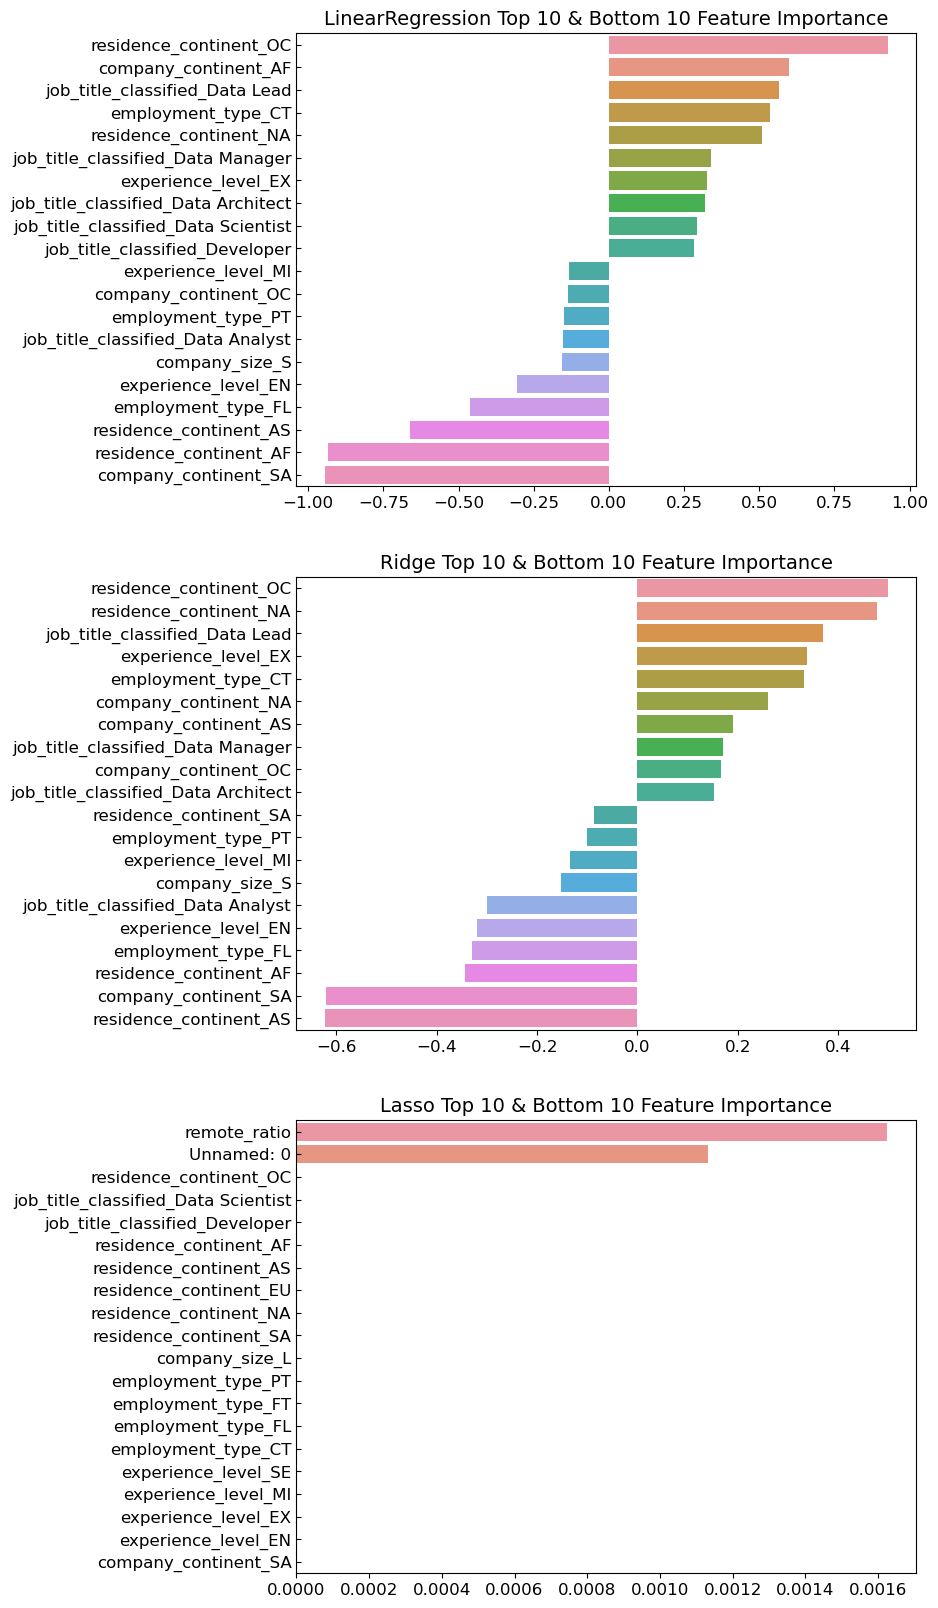

In [70]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(8, 20), nrows=3, ncols=1)
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__+' Top 10 & Bottom 10 Feature Importance', size=14)
        axs[i_num].tick_params(axis='y', direction='in')
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(12)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
visualize_coefficient(linear_models)

<div style='font-family:georgia'>
    - For linear regression model, <mark>residence in Oceania</mark> feature has the <b>most</b> importance, while <mark>residence continent in Asia</mark> has the <b>least</b> importance. <br/>
    - For ridge model, <mark>residence in North America</mark> feature has the <b>most</b> importance, while <mark>residence continent in Asia</mark> has the <b>least</b> importance. <br/>
    - For Lasso model, <mark>remote ratio</mark> has the <b>most</b> importance, and the rest of the features has <b>no importance</b> at all. It may mean it penalized <mark>too much</mark> to achieve simplicity of the model, which resulted in low RMSE. 
</div>

# Grid Search to Find Best Parameters

In [71]:
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.08, 0.1, 0.5, 1.5, 10]}
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge Optimized RMSE after 5 Fold CV: 0.5395, Best Parameter: {'alpha': 8}
Lasso Optimized RMSE after 5 Fold CV: 0.5454, Best Parameter: {'alpha': 0.001}


### LinearRegression ###
RMSE:  0.51582
LinearRegression 5 Fold CV Average RMSE: 0.53682
### Ridge ###
RMSE:  0.51564
Ridge 5 Fold CV Average RMSE: 0.52258
### Lasso ###
RMSE:  0.51544
Lasso 5 Fold CV Average RMSE: 0.52821


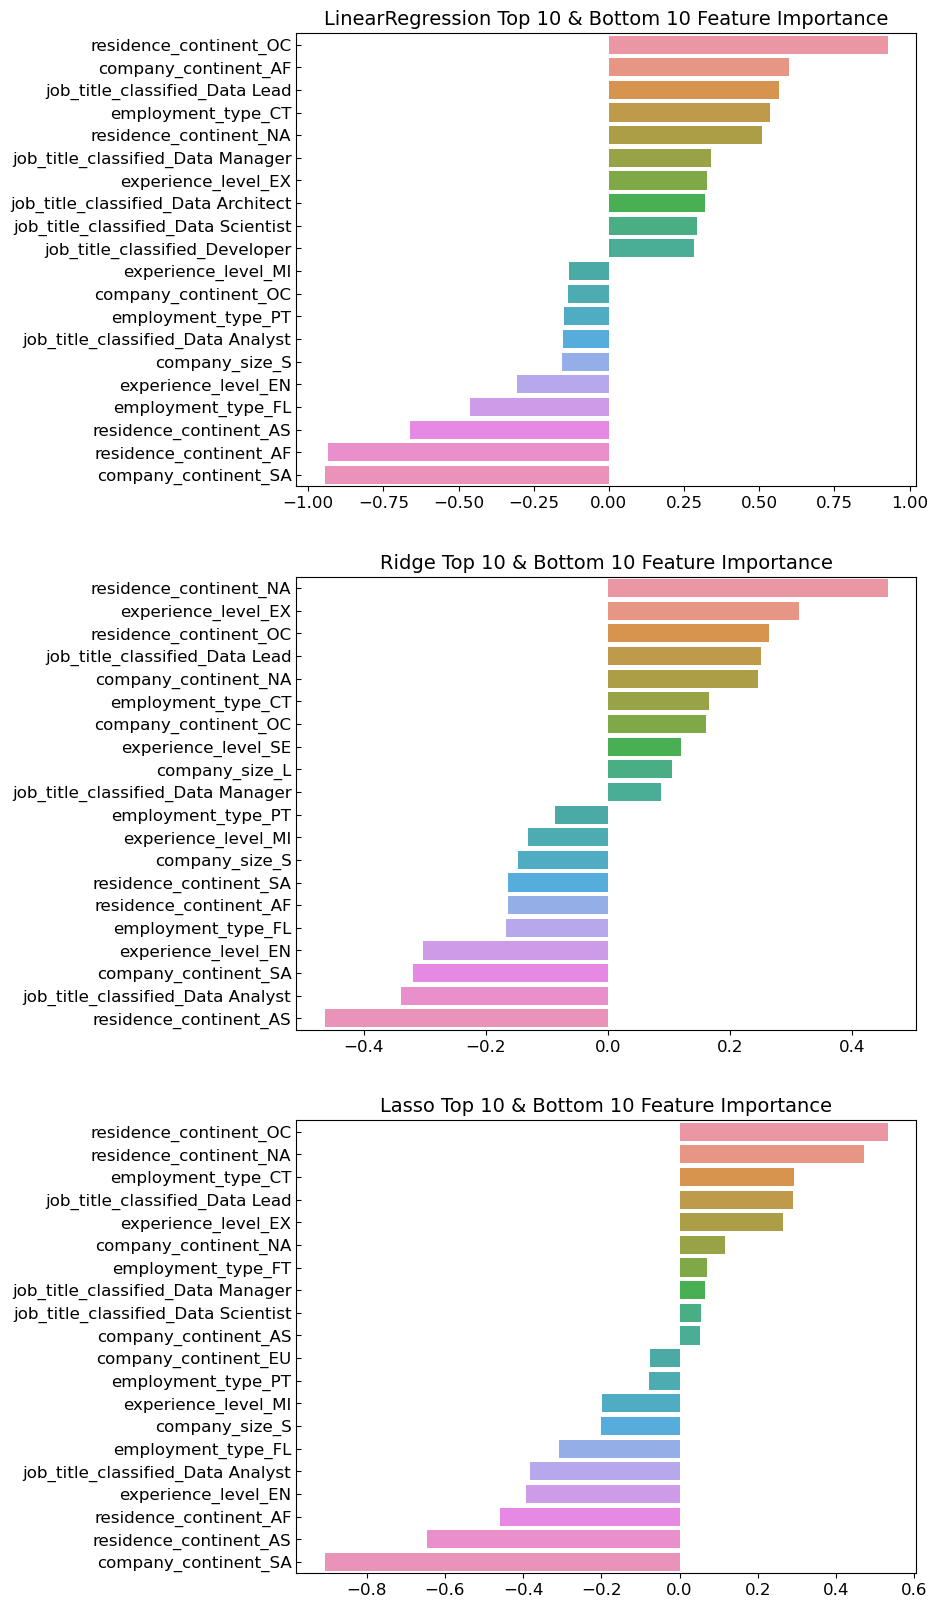

In [72]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    evaluate(model, X_train, X_test, y_train, y_test)
    avg_rmse_cv(model)
    
visualize_coefficient(models)

<div style='font-family:georgia'>
After grid search, I found that ridge has the best alpha of <b>5</b>, and lasso has the best alpha of <b>0.001</b>. <br/>
<hr/>
After modifying the parameters, although RMSE of ridge and lasso do not change from the default parameter, their feature importance do change: <br/>
<ul>
    - For ridge regression, <mark>residence in North America</mark> has the <b>highest</b> feature importance, while <mark>residence in Asia</mark> has the lowest feature importance. <br/>
    - For lasso regression, <mark>residence in North America</mark> has the <b>highest</b> feature importance, while <mark>residence in Asia</mark> has the lowest feature importance. <br/>
    </ul>
</div>

# Select Best Features

In [73]:
lr_best_features = select_best_features(lr_reg)
X_train, X_test, y_train, y_test = train_test_split(lr_best_features, log_y_target, test_size=0.3, random_state=156)
evaluate(lr_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(lr_reg)

LinearRegression: 12 features dropped
### LinearRegression ###
RMSE:  0.52178
LinearRegression 5 Fold CV Average RMSE: 0.53682


/tmp/ipykernel_20/948032242.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [74]:
ridge_best_features = select_best_features(ridge_reg)
X_train, X_test, y_train, y_test = train_test_split(ridge_best_features, log_y_target, test_size=0.3, random_state=156)
evaluate(ridge_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(ridge_reg)

Ridge: 13 features dropped
### Ridge ###
RMSE:  0.52807
Ridge 5 Fold CV Average RMSE: 0.52258


/tmp/ipykernel_20/948032242.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [75]:
lasso_best_features = select_best_features(lasso_reg)
X_train, X_test, y_train, y_test = train_test_split(lasso_best_features, log_y_target, test_size=0.3, random_state=156)
evaluate(lasso_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(lasso_reg)

Lasso: 19 features dropped
### Lasso ###
RMSE:  0.52646
Lasso 5 Fold CV Average RMSE: 0.52821


/tmp/ipykernel_20/948032242.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



After removing features with <b>0 or less than 0</b> feature importance, ridge analysis performs the best.

## Summary of Linear Regression Analysis

In [76]:
lr_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
fig = go.Figure(data=[
    go.Bar(name='Default Parameter', x=lr_models, y=[0.52922, 0.52614, 0.75121], text=[0.52922, 0.52614, 0.75121]),
    go.Bar(name='Best Parameter', x=lr_models, y=[0.52922, 0.52312, 0.52713], text=[0.52922, 0.52312, 0.52713]),
    go.Bar(name='Best Features', x=lr_models, y=[0.52922, 0.52312, 0.52713], text=[0.52922, 0.52312, 0.52713])
])
fig.update_layout(
    title_text='Linear Regression Summary',
    barmode='group',
    xaxis=dict(
        title='Models',
        titlefont_size=16
    ),
    yaxis=dict(
        title='RMSE',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

<div style='font-family:georgia'>
Overall, <mark>ridge regression</mark> performs the best after selecting best features with average RMSE being <b>0.52312</b>. 
<hr/><br/>
The factors that affect the ridge regression are <mark>residence in North America, entry experience level, company in North America, working as leader or director, residence in Oceania</mark>, and etc.
<hr/><br/>
    ** Selecting best features have <b>no effect</b> on RMSE score for linear regression models.
</div>

# Random Forest Regression Analysis

Since the dataset contains many <mark>categorical variables</mark> in independent variables, it may be better and <b>more accurate</b> to use random forest regression rather than linear regression. This is because random forest linear regression does <b>classification</b> and regression simultaneously.

<div style='font-family:georgia'>
In this section, I will perform random forest regression analysis by following these steps: <br/>
    <ul>
1. Compare RMSE, average RMSE after 5 fold cross validation, and visualize feature importance of random forest regression with default parameter <br/>
2. Find out best parameter using Grid Search, then compare RMSE, average RMSE after 5 fold cross validation, and visualize feature importance of random forest with best parameter <br/>
3. Compare RMSE and average RMSE after 5 fold cross validation of random forest regression after selecting best features with high importance
    </ul>
</div>

## Random Forest Regression with Default

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, log_y_target, test_size=0.3, random_state=156)

In [78]:
rf_reg = RandomForestRegressor(random_state=rs_value)

evaluate(rf_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(rf_reg)

### RandomForestRegressor ###
RMSE:  0.51086
RandomForestRegressor 5 Fold CV Average RMSE: 0.56188


Using default parameter, random forest regressor has average RMSE after 5 fold cross validation <b>0.56188</b>.

In [79]:
def get_top_bottom_rf_coef(model):
    coef = pd.Series(model.feature_importances_, index=X_features_ohe.columns)
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

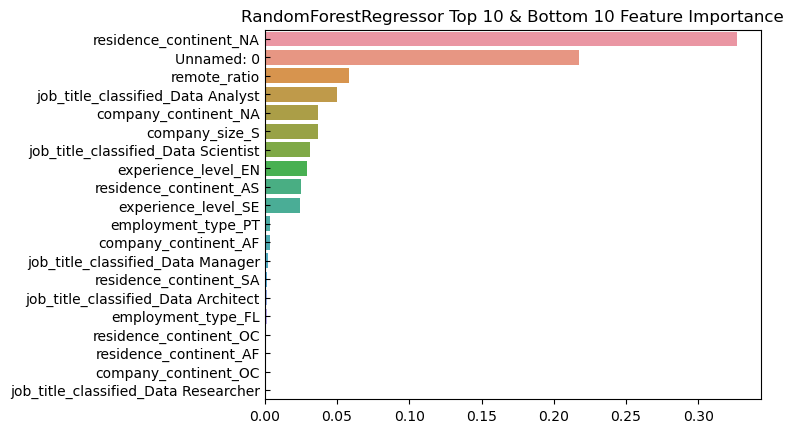

In [80]:
def rf_visualize_coefficient(model):
    coef_high, coef_low = get_top_bottom_rf_coef(model)
    coef_concat = pd.concat([coef_high, coef_low])
    plt.title(model.__class__.__name__+' Top 10 & Bottom 10 Feature Importance', size=12)
    plt.tick_params(axis='y', direction='in')
    sns.barplot(x=coef_concat.values, y=coef_concat.index)
    
rf_visualize_coefficient(rf_reg)

<mark>Residence in North America</mark> feature has the <b>most</b> importance, while <mark>job_title classified as data researcher</mark> has the <b>least importance</b> in random forest regression. 

# Select Best Features

In [81]:
rf_best_features = select_best_features_nonlinear(rf_reg)
X_train, X_test, y_train, y_test = train_test_split(rf_best_features, log_y_target, test_size=0.3, random_state=156)
evaluate(rf_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(rf_reg)

### RandomForestRegressor ###
RMSE:  0.57811
RandomForestRegressor 5 Fold CV Average RMSE: 0.56188


After selecting top 10 important features, the average RMSE after 5 fold cross validation for random forest regression is <b>0.56188</b>.

## Summary of Random Forest Regression 

In [82]:
fig = go.Figure(data=[
    go.Bar(name='Random Forest', 
           x=['Default Paramter', 'Best Parameter', 'Best Features'], 
           y=[0.56227, 0.5111, 0.5111],
           text=[0.56227, 0.5111, 0.5111],
           marker_color=['#264b96', '#bf212f', '#006f3c']
          )
])
fig.update_layout(
    title_text='Random Forest Summary',
    xaxis=dict(
        title='Methods',
        titlefont_size=16
    ),
    yaxis=dict(
        title='RMSE',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

The factors that affect the random forest regression are <mark>residence in North America, remote ratio, work year, job title classified as data analyst, residence continent in EU</mark>, and etc. 

# XGBoost Regression Analysis

When model is encountered with a categorical variable with a different number of classes, there lies a possibility that random forest may give <mark><b>more preferences for more participation</b></mark>. From univariate analysis, we observed that specific category has exceptionally large datasets compared to other categories. For example, about 96.9% of employees are full time workers in employment type variable (reference: 3.1.4). To <b>avoid</b> this problem, I will use XGBoost regression analysis to increase accuracy of modelling.

<div>
In this section, I will perform random forest regression analysis by following these steps: <br/>
    <ul>
1. Compare RMSE, average RMSE after 5 fold cross validation, and visualize feature importance of XGBoost regression with default parameter <br/>
2. Find out best parameter using Grid Search, then compare RMSE, average RMSE after 5 fold cross validation, and visualize feature importance of XGBoost with best parameter <br/>
3. Compare RMSE and average RMSE after 5 fold cross validation of XGBoost regression after selecting best features with high importance
    </ul>
</div>

## XGBoost Regression with Default

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, log_y_target, test_size=0.3, random_state=156)

In [84]:
xgb_reg = XGBRegressor(n_estimators=500, random_state=156)

evaluate(xgb_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(xgb_reg)

### XGBRegressor ###
RMSE:  0.51696
XGBRegressor 5 Fold CV Average RMSE: 0.5678


Using default parameter, XGBoost regressor has average RMSE after 5 fold cross validation <b>0.5678</b>.

In [85]:
def get_top_bottom_xgb_coef(model):
    coef = pd.Series(model.feature_importances_, index=X_features_ohe.columns)
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

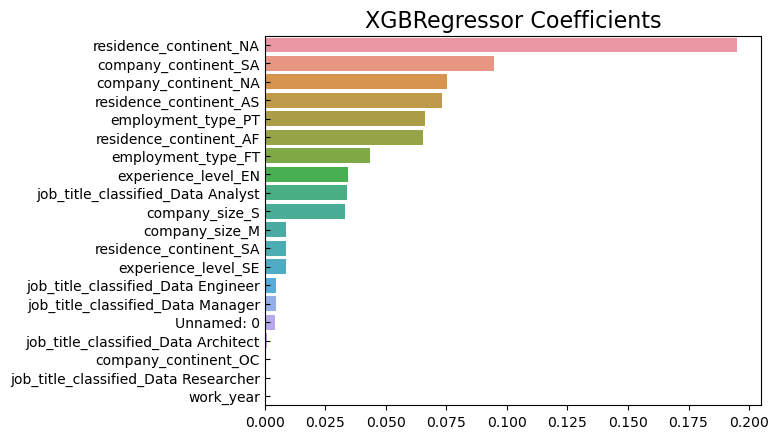

In [86]:
def xgb_visualize_coefficient(model):
    coef_high, coef_low = get_top_bottom_xgb_coef(model)
    coef_concat = pd.concat([coef_high, coef_low])
    plt.title(model.__class__.__name__+' Coefficients', size=16)
    plt.tick_params(axis='y', direction='in')
    sns.barplot(x=coef_concat.values, y=coef_concat.index)
    
xgb_visualize_coefficient(xgb_reg)

<mark>Residence in North America</mark> feature has the <b>most</b> importance, while <mark>job_title classified as data researcher</mark> has the <b>least</b> importance in XGBoost regression.

## Grid Search to Find Best Parameters

In [87]:
xgb_params = {'nthread':[4],
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

print_best_params(xgb_reg, xgb_params)

XGBRegressor Optimized RMSE after 5 Fold CV: 0.559, Best Parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

In [88]:
xgb_reg = XGBRegressor(colsample_bytree=0.7, 
                       learning_rate=0.03, 
                       max_depth=5, 
                       min_child_weight=4, 
                       n_estimators=500, 
                       nthread=4, 
                       objective='reg:squarederror', 
                       subsample=0.7)

evaluate(xgb_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(xgb_reg)

### XGBRegressor ###
RMSE:  0.51345
XGBRegressor 5 Fold CV Average RMSE: 0.53782


From Grid Search for XGBoost regression, the optimized parameter of XGBRegressor is <b>{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}.</b> Using best parameter, XGBoost regressor has average RMSE after 5 fold cross validation <b> 0.53782</b>.

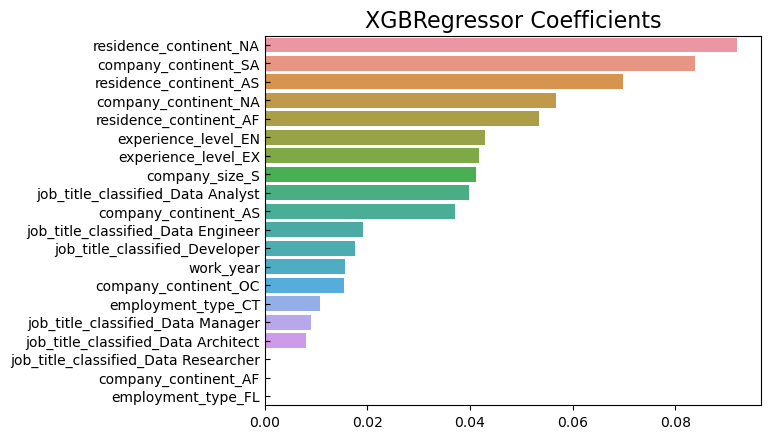

In [89]:
xgb_visualize_coefficient(xgb_reg)

<mark>Residence in continent Africa</mark> has the <b>most</b> feature importance, while <mark>employment type as full time</mark> has the <b>least</b> feature importance.

## Select Best Features

In [90]:
xgb_best_features = select_best_features_nonlinear(xgb_reg)
X_train, X_test, y_train, y_test = train_test_split(xgb_best_features, log_y_target, test_size=0.3, random_state=156)
evaluate(xgb_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(xgb_reg)

### XGBRegressor ###
RMSE:  0.54753
XGBRegressor 5 Fold CV Average RMSE: 0.53782


After selecting 10 important features, the average RMSE after 5 fold cross validation for XGB regression is <b>0.53782</b>.

## Summary of XGBoost Regression Analysis

In [91]:
fig = go.Figure(data=[
    go.Bar(name='XGBoost', 
           x=['Default Paramter', 'Best Parameter', 'Best Features'], 
           y=[0.58749, 0.54393, 0.54393],
           text=[0.58749, 0.54393, 0.54393],
           marker_color=['#264b96', '#bf212f', '#006f3c']
          )
])
fig.update_layout(
    title_text='XGBoost Summary',
    xaxis=dict(
        title='Methods',
        titlefont_size=16
    ),
    yaxis=dict(
        title='RMSE',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

The factors that affect the XGB regression are <mark>residence in continent Africa, residence in continent North America, Residence in continent Asia, job title classified as data analyst, experience level at entry level,</mark> and etc.

## Conclusion on Modelling

In [92]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regression', 'XGBoost Regression']
fig = go.Figure(data=[
    go.Bar(name='Best Score', x=models, 
           y=[0.52922, 0.52312, 0.52713, 0.5111, 0.54393], 
           text=[0.52922, 0.52312, 0.52713, 0.5111, 0.54393],
           marker_color=['#c94d4d', '#d8832b', '#dab71f', '#406244', '#242551'])
])
fig.update_layout(
    title_text='Modelling Summary',
    xaxis=dict(
        title='Models',
        titlefont_size=16
    ),
    yaxis=dict(
        title='RMSE',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

Overall, <mark>random forest regression</mark> performs the best by generating RMSE of <b>0.5111</b>. Among 5 models, the most affecting feature is <mark>residence in North America.</mark> Since residence is the most affecting feature for all 5 models, <mark>residence</mark> may be the important factor that affects the salary in usd

Despite this this is a small sample with 400+/- entryes into it so with the small sample size it will have a large inacuracy, however this gives a good example of uses for analysis models and there uses within datasets that are scalable to larger modles. This has the deep dive into the individual variables and there effet on the desiered value (sallary)